
Imported lazytransform v1.9. 

Imported featurewiz 0.5.4. Use the following syntax:
    >>> wiz = FeatureWiz(feature_engg = '', nrows=None, transform_target=True, scalers="std",
        		category_encoders="auto", add_missing=False, verbose=0. imbalanced=False,
        		ae_options={})
    >>> X_train_selected, y_train = wiz.fit_transform(X_train, y_train)
    >>> X_test_selected = wiz.transform(X_test)
    >>> selected_features = wiz.features
    


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


This Dataset has 9805 rows and 30 columns
Number of Malicious pdfs: 5372 Percent of malicious pdf: 54.79 %
Number of Non-Malicious pdfs: 4433 Percent of non-Malicious pdfs: 45.21 %
metadata size-endobj 0.00048
pdfsize-metadata size -0.00051
metadata size-endstream 0.00096
metadata size-Javascript 0.00247
metadata size-stream 0.00256
pageno-OpenAction -0.02557
xref-OpenAction -0.02853
trailer-OpenAction -0.05178
pageno-Acroform -0.05857
trailer-Acroform 0.06063
cechy wybrane przez rfe z najmniejszą korelacją:  ['pdfsize', 'stream', 'Javascript', 'endstream', 'metadata size', 'endobj']
cechy wybrane przez selectkbest z najmniejszą korelacją:  ['xref', 'pageno', 'Acroform', 'OpenAction', 'trailer']
Unikalne wybrane cechy:  ['stream', 'xref', 'pageno', 'endstream', 'Javascript', 'Acroform', 'metadata size', 'endobj', 'OpenAction', 'trailer']
                stream     xref   pageno  endstream  Javascript  Acroform  \
stream         1.00000  0.12447  0.28213    0.46475     0.01506   0.48496

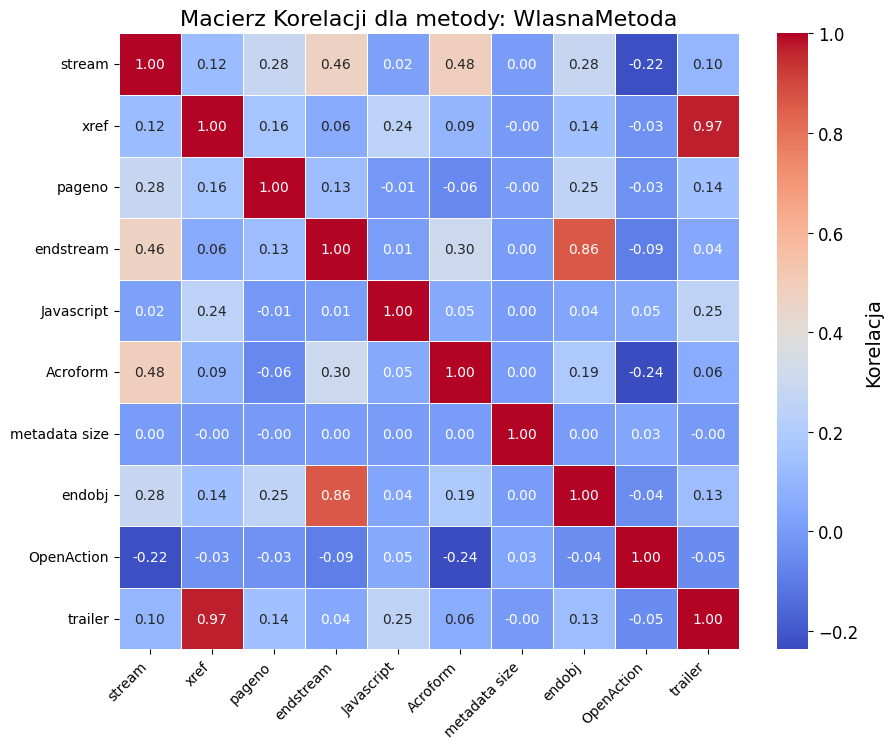

Number of features in learning model:  10
Selected features:  Index(['stream', 'xref', 'pageno', 'endstream', 'Javascript', 'Acroform',
       'metadata size', 'endobj', 'OpenAction', 'trailer'],
      dtype='object')
---------------------------------------------------------------------------------
------------------------------Własna metoda selekcji cech------------------
---------------------------------------------------------------------------------
Number of features in learning model:  10
Selected features:  Index(['stream', 'xref', 'pageno', 'endstream', 'Javascript', 'Acroform',
       'metadata size', 'endobj', 'OpenAction', 'trailer'],
      dtype='object')


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 9/12 [00:04<00:01,  2.19it/s]

[LightGBM] [Info] Number of positive: 3728, number of negative: 3135
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 6863, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.543203 -> initscore=0.173243
[LightGBM] [Info] Start training from score 0.173243


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:12<00:00,  1.02s/it]

                                Accuracy  Balanced Accuracy  ROC AUC  \
Model                                                                  
LGBMClassifier                   0.98878            0.98907  0.98907   
XGBClassifier                    0.98844            0.98877  0.98877   
RandomForestClassifier           0.98844            0.98869  0.98869   
CatBoostClassifier               0.98810            0.98806  0.98806   
HistGradientBoostingClassifier   0.98708            0.98739  0.98739   
GradientBoostingClassifier       0.98708            0.98706  0.98706   
AdaBoostClassifier               0.98199            0.98226  0.98226   
LinearSVC                        0.89667            0.89271  0.89271   

                                F1 Score  Recall  Precision     MCC  \
Model                                                                 
LGBMClassifier                   0.98879 0.98878    0.98882 0.97730   
XGBClassifier                    0.98845 0.98844    0.98849 0.9766

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import shap
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFE, SelectPercentile
from lazypredict.Supervised import LazyClassifier
from sklearnex import patch_sklearn
from featurewiz import featurewiz
from sklearn.feature_selection import RFE
patch_sklearn()
warnings.filterwarnings("ignore")


def get_least_correlated_features(X_features, method_name, num_features=10):
    print()
    print()
    """
    Zwraca listę num_features najmniej skorelowanych cech na podstawie danej ramki danych X_features.

    Parameters:
    - X_features: pandas DataFrame, ramka danych zawierająca cechy
    - num_features: int, liczba cech do wyboru (domyślnie 10)

    Returns:
    - least_correlated_features: list, lista zawierająca num_features najmniej skorelowanych cech
    """
    correlation_matrix = X_features.corr()
    correlation_pairs = []

    # Tworzymy pary cech wraz z wartościami bezwzględnymi korelacji
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            feature_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], abs(correlation_matrix.iloc[i, j]))
            correlation_pairs.append(feature_pair)

    # Sortujemy pary cech według wartości bezwzględnych korelacji rosnąco
    correlation_pairs.sort(key=lambda x: x[2])

    # Wybieramy num_features najmniej skorelowanych cech
    least_correlated_features = []
    i = 0
    while len(least_correlated_features) < num_features and i < len(correlation_pairs):
        feature_pair = correlation_pairs[i]
        if feature_pair[0] not in least_correlated_features and feature_pair[1] not in least_correlated_features:
            least_correlated_features.append(feature_pair[0])
            least_correlated_features.append(feature_pair[1])
        i += 1

    # Wyświetlamy najmniej skorelowane cechy w żądanym formacie
    print(f"{num_features} najmniej skorelowane cechy dla metody: {method_name}")
    for feature_pair in correlation_pairs[:num_features]:
        print(f"{feature_pair[0]} - {feature_pair[1]}: {feature_pair[2]:.5f}")

    return least_correlated_features[:num_features]


def find_lowest_correlation_pairs(X_features):
    # Oblicz macierz korelacji
    correlation_matrix = X_features.corr()

    # Przygotuj listę par cech i ich korelacji
    correlation_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            correlation = correlation_matrix.iloc[i, j]
            correlation_pairs.append((feature1, feature2, correlation))

    # Posortuj listę według wartości korelacji
    sorted_pairs = sorted(correlation_pairs, key=lambda x: abs(x[2]))

    # Wybierz 5 par z najniższą korelacją
    selected_pairs = sorted_pairs[:5]

    # Wypisz pary z wartościami korelacji
    for pair in selected_pairs:
        print(f"{pair[0]}-{pair[1]} {pair[2]:.5f}")

    # Zwróć unikalne nazwy cech
    unique_feature_names = set(pair[0] for pair in selected_pairs).union(pair[1] for pair in selected_pairs)
    return list(unique_feature_names)


def plot_correlation_matrix(features, method_name):
    correlation_matrix = features.corr()
    # Utwórz wykres heatmapy
    plt.figure(figsize=(10, 8))  # Zmniejsz rozmiar wykresu
    heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Korelacja'})
    # Dostosuj kolor i rozmiar tekstu na osiach x, y i osi kolorów (cbar)
    heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10, rotation=45, ha='right')
    heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)
    # Dostosuj kolor i rozmiar tekstu na osi kolorów (cbar)
    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=12)
    # Zamiast cbar.set_ylabel, możemy skorzystać z tytułu osi kolorów
    cbar.set_label('Korelacja', fontsize=14)
    plt.title('Macierz Korelacji dla metody: ' + method_name, fontsize=16)
    folder_name = 'wykresyPDFMAL'  # Stała wartość folder_name
    os.makedirs(folder_name, exist_ok=True)
    # Zapisz wykres w folderze bez białego tła (transparent=True)
    plt.savefig(os.path.join(folder_name, f'{method_name}_wykres_korelacji_temp_PDFMAL.png'), transparent=True)
    plt.show()

def get_top_correlated_features(X_features, method_name, threshold=0.3, num_features=10):
    print()
    print()
    """
    Zwraca listę num_features najbardziej skorelowanych cech na podstawie danej ramki danych X_features.

    Parameters:
    - X_features: pandas DataFrame, ramka danych zawierająca cechy
    - threshold: float, próg korelacji, powyżej którego cechy są uznawane za mocno skorelowane (domyślnie 0.8)
    - num_features: int, liczba cech do wyboru (domyślnie 6)

    Returns:
    - top_correlated_features: list, lista zawierająca num_features najbardziej skorelowanych cech
    """
    correlation_matrix = X_features.corr()
    correlation_pairs = []

    # Tworzymy pary cech wraz z wartościami bezwzględnymi korelacji
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            feature_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], abs(correlation_matrix.iloc[i, j]))
            correlation_pairs.append(feature_pair)

    # Sortujemy pary cech według wartości bezwzględnych korelacji w malejącej kolejności
    correlation_pairs.sort(key=lambda x: x[2], reverse=True)

    # Wybieramy num_features najbardziej skorelowanych cech
    top_correlated_features = []
    i = 0
    while len(top_correlated_features) < num_features and i < len(correlation_pairs):
        feature_pair = correlation_pairs[i]
        if feature_pair[0] not in top_correlated_features and feature_pair[1] not in top_correlated_features:
            top_correlated_features.append(feature_pair[0])
            top_correlated_features.append(feature_pair[1])
        i += 1

    # Wyświetlamy najbardziej skorelowane cechy w żądanym formacie
    print(f"{num_features} najbardziej skorelowane cechy dla metody: {method_name}")
    for feature_pair in correlation_pairs[:num_features]:
        print(f"{feature_pair[0]} - {feature_pair[1]}: {feature_pair[2]:.5f}")

    return top_correlated_features[:num_features]

def find_unique_features(feature_lists):
    # Utwórz listę cech
    all_features = [feature for features in feature_lists for feature in features]

    # Znajdź unikalne cechy
    unique_features = list(set(all_features))

    # Wybierz pierwsze 10 unikalnych cech
    selected_unique_features = unique_features[:10]

    return selected_unique_features


file_path = r"C:/Users/earth/Desktop/PracaMagisterska_WitoldWluczkowski/ZbioryDanych/PDFMal2022_clear.xlsx"
dataset = pd.read_excel(file_path, index_col=0)

# Przetwarzanie danych
drop_columns = ["Fine name", "text", "header"]
dataset.drop(columns=drop_columns, inplace=True, errors='ignore')
dataset = dataset.rename(columns={'Class': 'Label'})
dataset['Label'].replace({'Malicious': 1, 'Benign': 0}, inplace=True)
dataset = dataset.astype(float, errors='ignore')
to_change = ["images", 
             "obj", "endobj", "endstream", 
             "xref", "startxref", "pageno", "JS", "Javascript", 
             "AA", "OpenAction", "Acroform", "JBIG2Decode", "RichMedia", "launch", "EmbeddedFile", "XFA"] # Kolumny, które mają inne wartości niż flaot
for i in to_change:
    dataset[i] = pd.to_numeric(dataset[i], errors='coerce')
for col in dataset.columns:
    dataset[col][dataset[col] < 0] = 0
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
print("This Dataset has {} rows and {} columns".format(dataset.shape[0], dataset.shape[1]))

# Statystyki dotyczące danych
malign = dataset[dataset['Label'] == 1]
benign = dataset[dataset['Label'] == 0]
print('Number of Malicious pdfs:', len(malign), "Percent of malicious pdf:", round((len(malign) / dataset.shape[0]) * 100, 2), '%')
print('Number of Non-Malicious pdfs:', len(benign), "Percent of non-Malicious pdfs:", round((len(benign) / dataset.shape[0]) * 100, 2), '%')


# Wybór cech RFE
X = dataset.drop(['Label'], axis=1)
y = dataset['Label']
rfe = RFE(estimator=RandomForestClassifier(max_depth=5), n_features_to_select=8)
rfe.fit_transform(X, y)
cols_idxs_rfe = rfe.get_support(indices=True)
X_features_rfe = dataset.iloc[:, cols_idxs_rfe]
rfe_least_correlated = find_lowest_correlation_pairs(X_features_rfe) 


# Wybór cech SelectKBest
X = dataset.drop(['Label'], axis=1)
y = dataset['Label']
selectkbest = SelectKBest(score_func=f_classif, k=8)
selectkbest.fit_transform(X, y)
cols_idxs_selectkbest = selectkbest.get_support(indices=True)
X_features_selectkbest = dataset.iloc[:, cols_idxs_selectkbest]
selectkbest_least_correlated = find_lowest_correlation_pairs(X_features_selectkbest)

print("cechy wybrane przez rfe z najmniejszą korelacją: ", rfe_least_correlated)
print("cechy wybrane przez selectkbest z najmniejszą korelacją: ", selectkbest_least_correlated)
selected_unique_features = find_unique_features([rfe_least_correlated, selectkbest_least_correlated])
print("Unikalne wybrane cechy: ", selected_unique_features)

X_features = dataset[selected_unique_features]
correlation_matrix = X_features.corr()
print(correlation_matrix)
cechy = get_top_correlated_features(X_features, "WlasnaMetoda")
plot_correlation_matrix(X_features, "WlasnaMetoda")


X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, shuffle=True)
print("Number of features in learning model: ", X_train.shape[1])
print("Selected features: ", X_features.columns)

imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

print("---------------------------------------------------------------------------------")
print("------------------------------Własna metoda selekcji cech""------------------")
print("---------------------------------------------------------------------------------")
print("Number of features in learning model: ", X_train.shape[1])
print("Selected features: ", X_features.columns)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_std, X_test_std, y_train, y_test)
print(models)